<a href="https://colab.research.google.com/github/viviansharp/python_exercise/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stroke is a critical health problem globally. It remains as the second leading cause of death worldwide since 2000 . Apart from that, stroke is the third major cause of disability. Long term disability affects people severely, in terms of their productive life. As such, stroke possesses significant threat to global health.


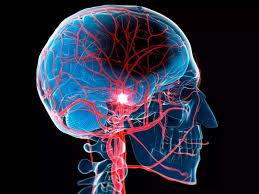

This notebook aims to identify the risk factors for stroke. The patient data was obtained from Kaggle. Methods to ascertain whether a variable is a risk factor were described. Results were visualised and discovered insights were discussed. It is ended with a conclusion and some ideas were suggested for future work.



In [ ]:
#Descriptive Data Analysis
#Import neccessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
#Load the dataset and explore the first 5 rows
df=pd.read_csv("stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset consisted of 10 metrics for a total of 5110 patients. These metrics included patients’ demographic data (gender, age, marital status, type of work and residence type) and health records (hypertension, heart disease, average glucose level measured after meal, Body Mass Index (BMI), smoking status and experience of stroke).

In [ ]:
#descriptive statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#breakdown of stroke attributes
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Out of 5110 patients , 249 had stroke while 4861 didnt have the experience.In line with other healthcare datasets, this dataset was highly unbalanced as well.

DATA PREPROCESSING

1) ID attribute
This attribute was used to identify patients solely and did not have other meaningful information. Hence, the entire column was removed.

In [ ]:
#DROP ID COLUMN
df.drop(columns=['id'], inplace=True)


2.) BMI Attribute
This contains missing values

In [ ]:
df.isnull().sum()/len(df)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
#use fillna to fill in missing number,you can use the mean of the specified column
x = df["bmi"].mean()
df["bmi"].fillna(x, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


3.)Gender

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
#drop other category 
df = df[df['gender'] != 'Other']

EXPOLATORY DATA ANALYSIS


In [ ]:
#USING 100% STACKED BAR CHART
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = df.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

NUMERICAL ATTRIBUTES

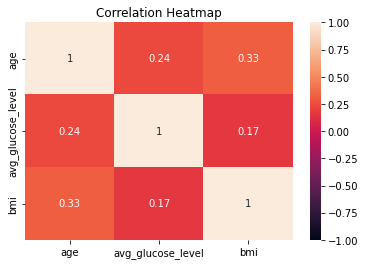

In [ ]:
# Create the correlation heatmap
heatmap = sns.heatmap(df[['age', 'avg_glucose_level', 'bmi']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');

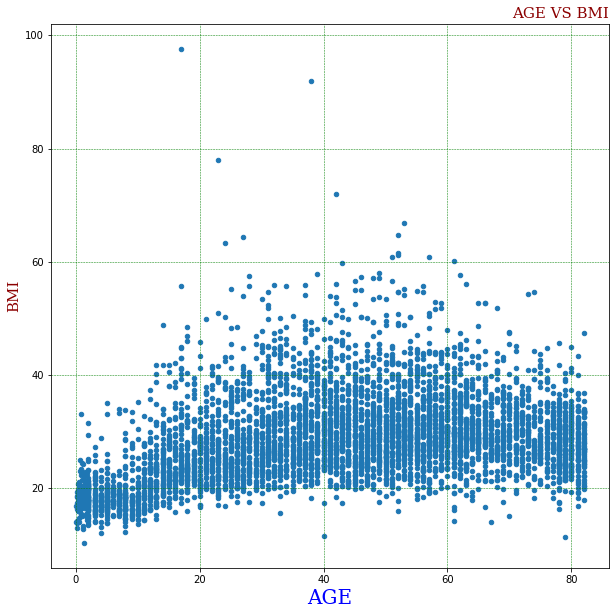

In [ ]:
df.plot(kind='scatter',x='age',y="bmi",figsize=(10,10))
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("AGE VS BMI",fontdict=font2, loc="right")
plt.xlabel("AGE",fontdict=font1)
plt.ylabel("BMI",fontdict=font2)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5) #plt.grid(axis='x' / axis='y')
plt.show()

Insight #1: It seemed like both BMI and Age were positively correlated, though the association was not strong.

Numerical Attributes vs Stroke

1) AGE VS STROKE

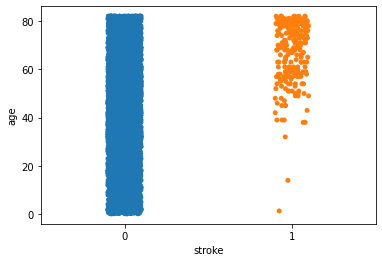

In [ ]:
sns.stripplot(x="stroke",y="age",data=df)

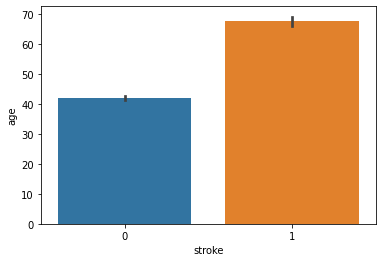

In [ ]:

sns.barplot(x="stroke",y='age',data=df)

The risk of experiencing a stroke increased as patient’s age advanced.

Insight #2: Older patient was more likely to suffer a stroke than a younger patient.

2.)BMI VS STROKE

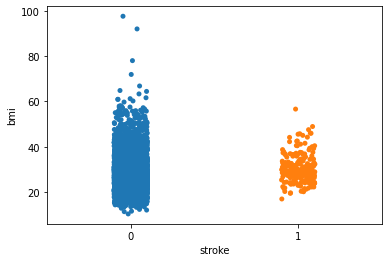

In [ ]:
sns.stripplot(x="stroke",y="bmi",data=df)

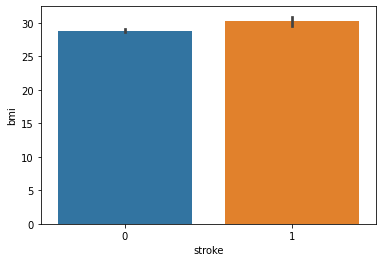

In [ ]:
sns.barplot(x="stroke",y='bmi',data=df)

Percentage of patient who had BMI between 25 and 35 was the highest to suffer a stroke than patients from other groups.

Insight #3: Higher BMI does not increase the stroke risk.



Average glucose level vs Stroke


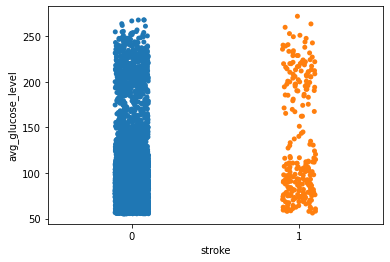

In [ ]:
#matplotlib tutorial
sns.stripplot(x="stroke",y ="avg_glucose_level",data=df)

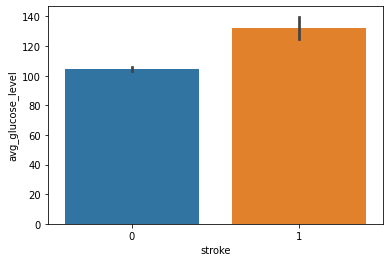

In [ ]:
sns.barplot(x="stroke",y="avg_glucose_level",data=df)

Higher proportion of patient who had average glucose level measured after meal of more than 150mg/dL (milligrams per decilitre) suffered a stroke. This observation can be explained by the presence of diabetes. Diabetes was present in patient who had reading of more than 200mg/dL. Pre-diabetes was also considered in patient if the reading was between 140–199mg/dL.

Insight #4: Diabetes is one of the risk factors for stroke occurrence and prediabetes patients have an increased risk of stroke.

CATEGORICAL VARIABLES

1)Hypertension vs Stroke

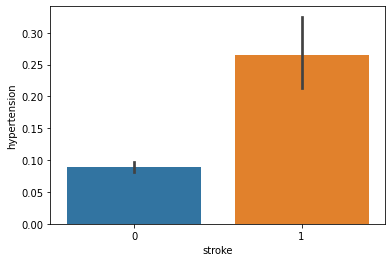

In [ ]:
sns.barplot(x="stroke",y="hypertension",data=df)

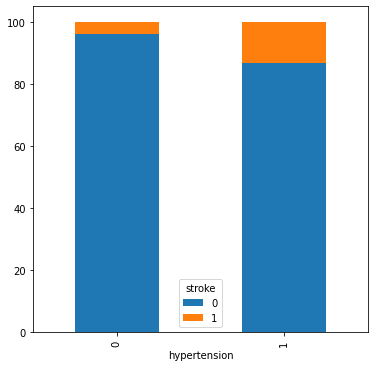

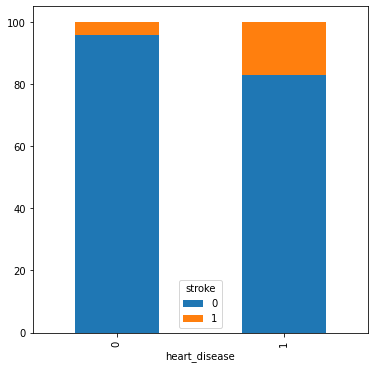

In [ ]:
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')

Insight #5: Higher proportion of patients who suffered from hypertension or heart disease experienced a stroke, all else being equal.



2)Gender , residence type vs stroke

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


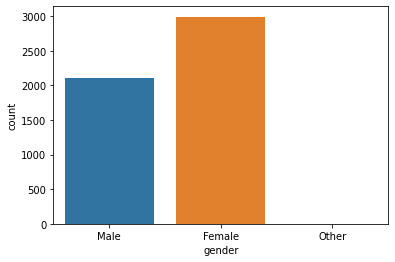

In [ ]:
sns.countplot(df["gender"])

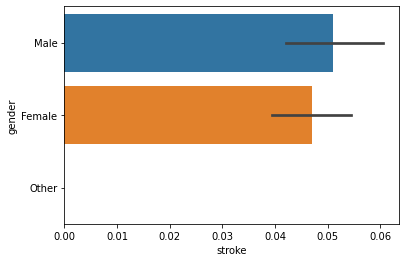

In [ ]:
sns.barplot(x="stroke",y="gender",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


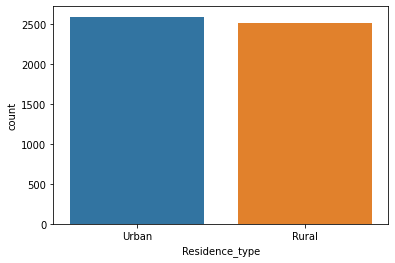

In [ ]:
sns.countplot(df["Residence_type"])

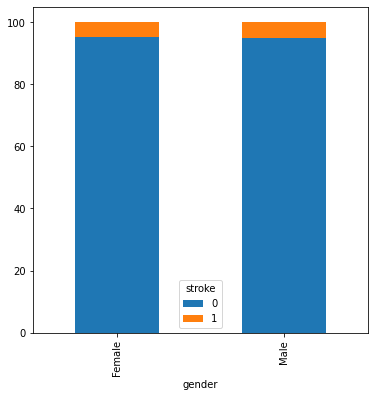

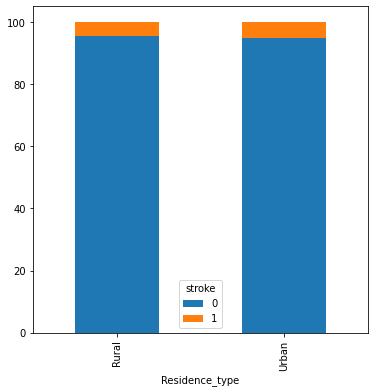

In [ ]:
get_100_percent_stacked_bar_chart('gender')
get_100_percent_stacked_bar_chart('Residence_type')

Insight #6: Regardless of patient’s gender, and where they stayed, they have the same likelihood to experience stroke.

3) Age,work_type vs stroke

age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2924  45.510602
Self-employed   819  60.201465
children        687   6.841339

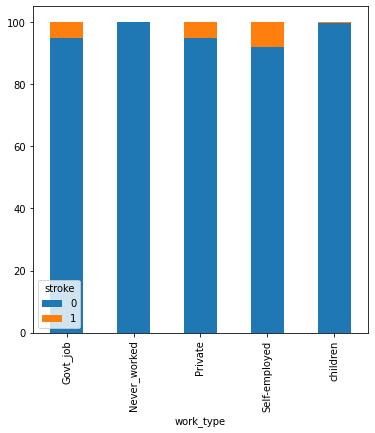

In [ ]:
get_100_percent_stacked_bar_chart('work_type')
df.groupby(['work_type'])[['age']].agg(['count', 'mean'])

patient who was self-employed and suffered a stroke was relatively higher than other categories. However, this variable was highly associated with age.

Both never worked and children categories were pretty self-explanatory. Almost non-existent stroke was recorded due to lower average age. On the other hand, the mean age of patients who were self-employed was 59.3 years old.This corroborate our insight #1

Insight #7: Work type variable was highly associated with age.



4) Ever married vs stroke

age           
             count       mean
ever_married                 
No            1756  22.011959
Yes           3353  54.342082

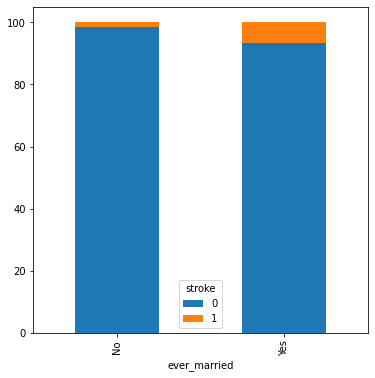

In [ ]:
get_100_percent_stacked_bar_chart('ever_married')
df.groupby(['ever_married'])[['age']].agg(['count', 'mean'])

Insight #8: Marital status variable was highly associated with age.
Married people are more predispose to stroke

KEY TAKEAWAYS




1.  It seemed like both BMI and Age were positively correlated, though the association was not strong

2.  Older patient was more likely to suffer a stroke than a younger patient.

3. Higher BMI does not increase the stroke risk

4. Diabetes is one of the risk factors for stroke occurrence and prediabetes patients have an increased risk of stroke.

5. Higher proportion of patients who suffered from hypertension or heart disease experienced a stroke, all else being equal.

6. Regardless of patient’s gender, and where they stayed, they have the same likelihood to experience stroke

7. Work type variable was highly associated with age.

8. Marital status variable was highly associated with age.
